# HEALTHCARE OF PATIENT ANALYSIS

Yogini Pawar
Batch Code: 8220  
Mentor: Rajshri Thete

**Objectives**

Analyze the distribution of patients based on gender, age, and contact information to understand the demographics of the patient population.

Evaluate the status of patient appointments (e.g., scheduled, completed, or cancelled) to identify trends in appointment management and patient compliance.

Examine the medical history of patients to identify common conditions and treatments, helping to understand prevalent health issues within the patient population.
Treatment Effectiveness Evaluation:

Assess the effectiveness of various treatments on patient conditions over time, analyzing whether follow-up appointments correlate with improvements in health outcomes.
Data Quality Assessment:

Investigate data integrity by checking for missing or inconsistent records in patient demographics, appointments, and medical histories, ensuring the reliability of the database

In [1]:
!pip install mysql-connector-python
!pip install pymysql
!pip3 install pymysql


In [54]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
connection = mysql.connector.connect(
    user='root',
    password='root',
    host='localhost',
    port=3306,
    database='HealthcareDB'
)


# Exploratory Data Analysis

In [56]:
query = 'select * from Patients'
patients_data = pd.read_sql(query, connection)
patients_data.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_8340\914783099.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  patients_data = pd.read_sql(query, connection)


,patient_id,FullName,dob,gender,contact_number
0,1,Olot Volcanic,2019-11-05,Female,9128702069
1,2,Calatrava,2020-10-08,Female,9120202972
2,3,Larderello,2020-09-03,Male,9126591978
3,4,Vulsini,2001-08-27,Male,9126470042
4,5,Colli Alban,2002-07-08,Male,9122266351


In [57]:
query = 'select * from Appointments'
Appointments_data = pd.read_sql(query, connection)
Appointments_data.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_8340\4232942443.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Appointments_data = pd.read_sql(query, connection)


,appointment_id,patient_id,appointment_date,doctor_name,status
0,1,1,2024-01-20,Dr John Smith,Scheduled
1,2,2,2024-02-20,Dr Emily Johnson,Completed
2,3,3,2024-02-27,Dr Michael Brown,Cancelled
3,4,4,2024-03-10,Dr Sarah Davis,Scheduled
4,5,5,2024-04-11,Dr David Wilson,Completed


In [58]:
query = 'select * from Medical_History'
Medical_History_data = pd.read_sql(query, connection)
Medical_History_data.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_8340\196037310.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Medical_History_data = pd.read_sql(query, connection)


,history_id,patient_id,condition,date_diagnosed,treatment
0,1,1,Hypertension,2023-05-15,Medication
1,2,2,Diabetes,2022-11-20,Insulin
2,3,3,Asthma,2021-08-10,Inhaler
3,4,4,Arthritis,2020-02-25,Physical Therapy
4,5,5,Migraine,2023-01-05,Pain Relief


**Merging all the columns using foreign key**

In [59]:
# Define your query
query = """
SELECT 
    a.patient_id,
    a.appointment_date,
    a.doctor_name,
    a.status,
    p.FullName,
    p.dob,
    p.gender,
    p.contact_number,
    m.`condition`,
    m.date_diagnosed,
    m.treatment
FROM 
    Appointments a
JOIN 
    Patients p ON a.patient_id = p.patient_id
JOIN 
    Medical_History m ON a.patient_id = m.patient_id
"""

# Execute the query and fetch the data
cursor = connection.cursor()
cursor.execute(query)
result = cursor.fetchall()

# Get column names
columns = [desc[0] for desc in cursor.description]

# Convert to DataFrame
df = pd.DataFrame(result, columns=columns)


# Display the DataFrame
df.head()


,patient_id,appointment_date,doctor_name,status,FullName,dob,gender,contact_number,condition,date_diagnosed,treatment
0,1,2024-01-20,Dr John Smith,Scheduled,Olot Volcanic,2019-11-05,Female,9128702069,Hypertension,2023-05-15,Medication
1,2,2024-02-20,Dr Emily Johnson,Completed,Calatrava,2020-10-08,Female,9120202972,Diabetes,2022-11-20,Insulin
2,3,2024-02-27,Dr Michael Brown,Cancelled,Larderello,2020-09-03,Male,9126591978,Asthma,2021-08-10,Inhaler
3,4,2024-03-10,Dr Sarah Davis,Scheduled,Vulsini,2001-08-27,Male,9126470042,Arthritis,2020-02-25,Physical Therapy
4,5,2024-04-11,Dr David Wilson,Completed,Colli Alban,2002-07-08,Male,9122266351,Migraine,2023-01-05,Pain Relief


# DATA CLEANING

In [60]:
# Check for missing values
print(df.isnull().sum())

patient_id          0
appointment_date    0
doctor_name         0
status              0
FullName            0
dob                 0
gender              0
contact_number      0
condition           0
date_diagnosed      0
treatment           0
dtype: int64


In [61]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)


In [62]:
# Fill or drop missing values if necessary
df.fillna('Unknown', inplace=True)  # Example: Filling missing values

In [63]:
df.head()

,patient_id,appointment_date,doctor_name,status,FullName,dob,gender,contact_number,condition,date_diagnosed,treatment
0,1,2024-01-20,Dr John Smith,Scheduled,Olot Volcanic,2019-11-05,Female,9128702069,Hypertension,2023-05-15,Medication
1,2,2024-02-20,Dr Emily Johnson,Completed,Calatrava,2020-10-08,Female,9120202972,Diabetes,2022-11-20,Insulin
2,3,2024-02-27,Dr Michael Brown,Cancelled,Larderello,2020-09-03,Male,9126591978,Asthma,2021-08-10,Inhaler
3,4,2024-03-10,Dr Sarah Davis,Scheduled,Vulsini,2001-08-27,Male,9126470042,Arthritis,2020-02-25,Physical Therapy
4,5,2024-04-11,Dr David Wilson,Completed,Colli Alban,2002-07-08,Male,9122266351,Migraine,2023-01-05,Pain Relief


In [64]:
#Group by gender and count patients:

gender_counts = df.groupby('gender')['patient_id'].count()
print(gender_counts)


gender
Female    24
Male      26
Name: patient_id, dtype: int64


In [101]:
# Query to count patients diagnosed with each condition (with escaped 'condition')

query = """
SELECT `condition`, COUNT(*) AS patient_count
FROM Medical_History
GROUP BY `condition`;
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Convert to DataFrame
df_conditions = pd.DataFrame(results, columns=['Condition', 'Patient Count'])

# Display the DataFrame
print(df_conditions)

       Condition  Patient Count
0   Hypertension              5
1       Diabetes              5
2         Asthma              5
3      Arthritis              5
4       Migraine              5
5        Allergy              5
6     Depression              5
7        Anxiety              5
8        Obesity              5
9  Heart Disease              5


In [65]:
#Average age of patients:

df['dob'] = pd.to_datetime(df['dob'])  # Convert dob to datetime
df['age'] = (pd.Timestamp.now() - df['dob']).dt.days // 365  # Calculate age
average_age = df['age'].mean()
print(f'Average Age: {average_age:.2f}')


Average Age: 16.02


In [66]:
#Count of appointments by status:

appointment_status_counts = df['status'].value_counts()
print(appointment_status_counts)


status
Scheduled    17
Completed    17
Cancelled    16
Name: count, dtype: int64


# Visualization

**1) Patient Gender Distribution**

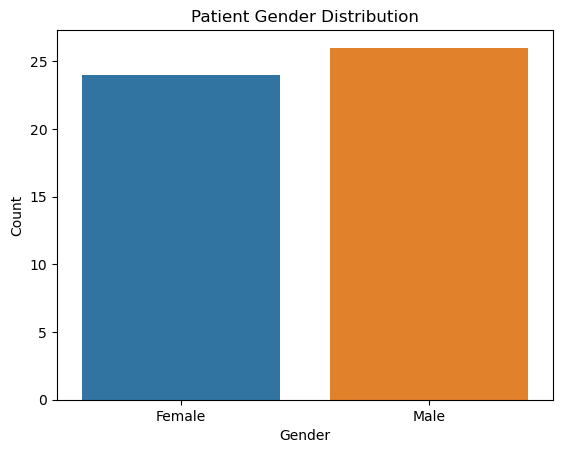

In [67]:
#Patient Gender Distribution
sns.countplot(data=df, x='gender')
plt.title('Patient Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


 **Insights : The Highest number of patient is male**

**2) Count of appointments by status**

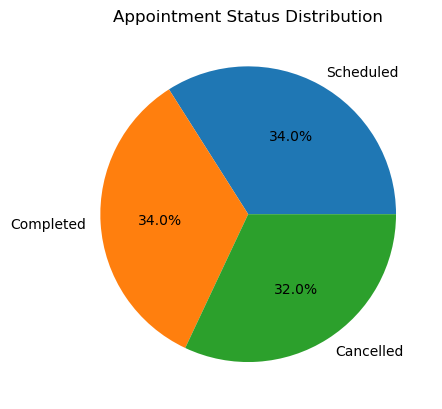

In [68]:
##Count of appointments by status:

appointment_status_counts.plot.pie(autopct='%1.1f%%')
plt.title('Appointment Status Distribution')
plt.ylabel('')
plt.show()


**Insights: There are 34% completed and scheduled status, 32% cancelled status**

**3) Age Distribution of patients**

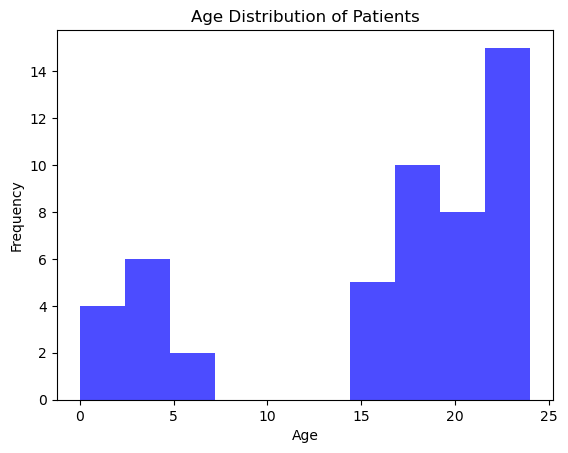

In [69]:
#Histogram for age distribution:

plt.hist(df['age'], bins=10, color='blue', alpha=0.7)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Insights : The age above 14 has the freqency**

**4) Counting the occurrences of each medical condtion**

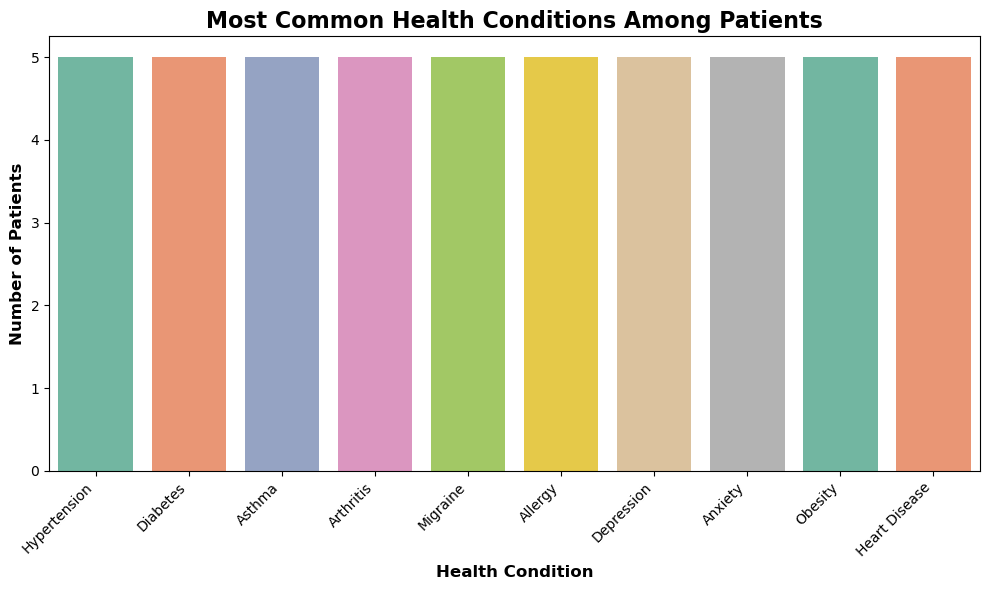

In [70]:
# Count the occurrences of each medical condition
condition_counts = df['condition'].value_counts()

# Plot a bar chart for common conditions
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_counts.index, y=condition_counts.values, palette="Set2")
plt.title('Most Common Health Conditions Among Patients', fontsize=16, fontweight='bold')
plt.xlabel('Health Condition', fontsize=12, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


**Insights: As you can see all the conditions has equal number of patients**

**5) Seeing the count chart of treatment**

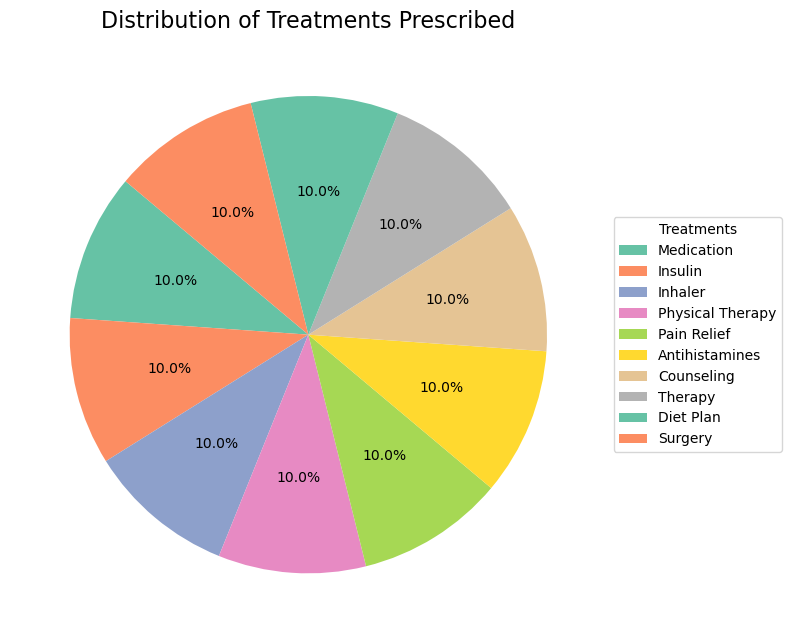

In [71]:
# Pie Chart of Treatment Distribution

# Count the occurrences of each treatment
treatment_counts = df['treatment'].value_counts()

# Plot a pie chart for treatment distribution
plt.figure(figsize=(8, 8))
plt.pie(treatment_counts.values, labels=None, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))

# Add legend
plt.legend(treatment_counts.index, title="Treatments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add title
plt.title('Distribution of Treatments Prescribed', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


**Insights: As you can see all the conditions has equal number of patients**

**6) Health conditions by gender**

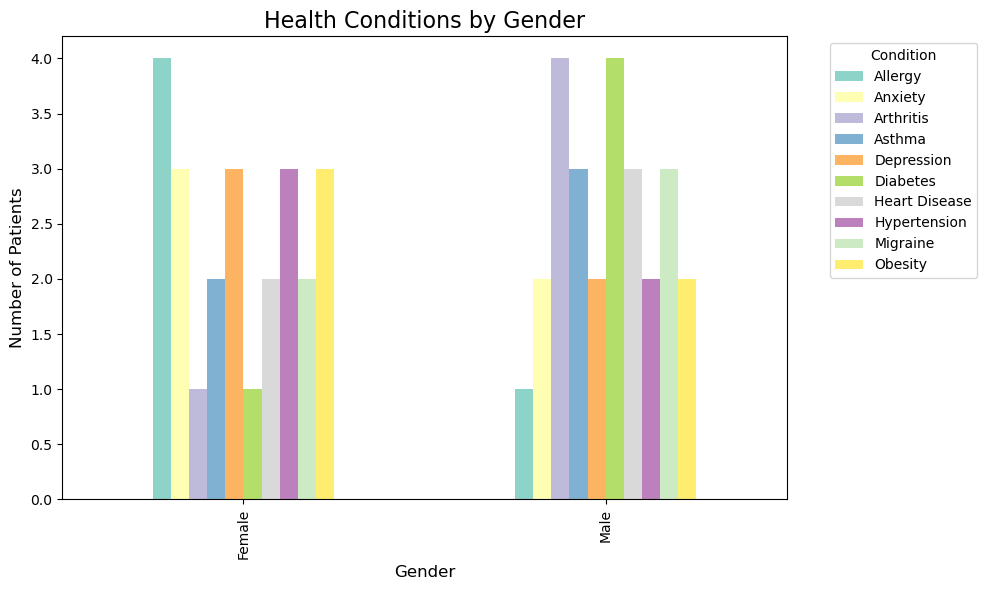

In [72]:
# Group by gender and condition

# Grouped Bar Plot: Health Conditions by Gender
gender_condition.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='Set3')
plt.title('Health Conditions by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





**Insights : The highest number of patients for female is Allerry condtion and for male is arthritis and Diabetes**

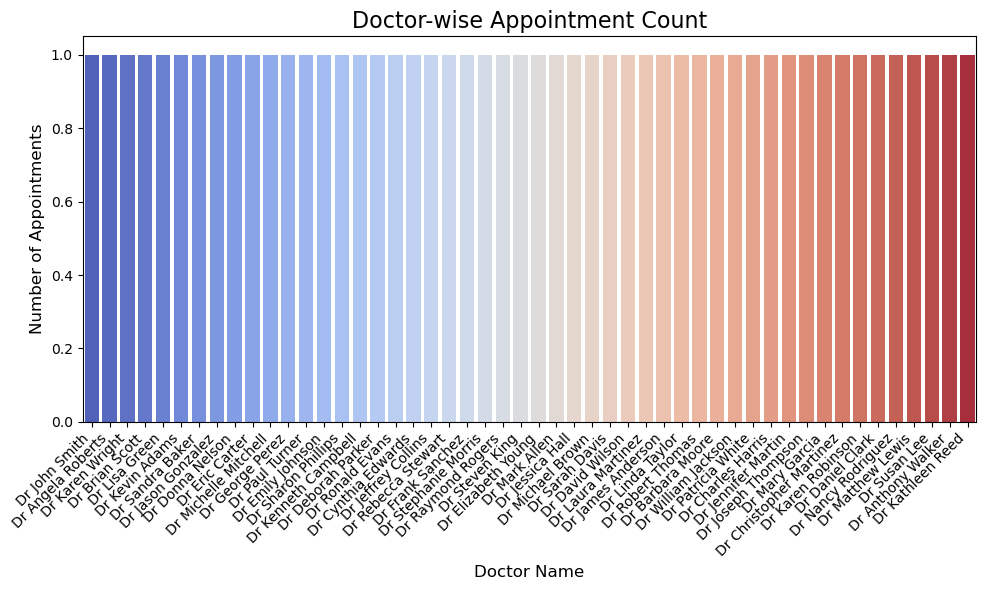

In [87]:
doctor_counts = df['doctor_name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=doctor_counts.index, y=doctor_counts.values, palette='coolwarm')
plt.title('Doctor-wise Appointment Count', fontsize=16)
plt.xlabel('Doctor Name', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**8) Visualize how appointments are distributed over time**

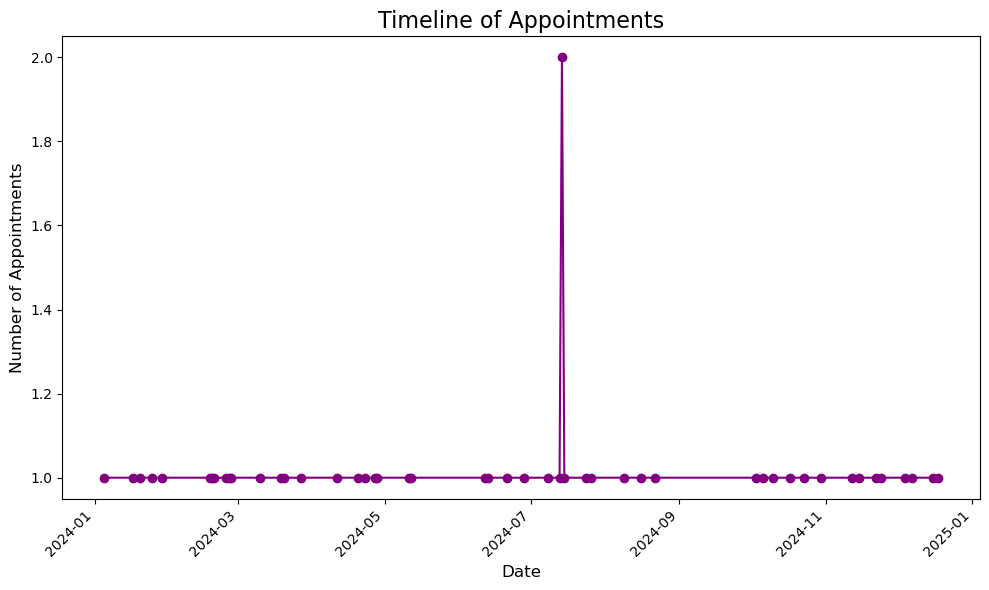

In [88]:
df['appointment_date'] = pd.to_datetime(df['appointment_date'])
appointment_counts = df.groupby(df['appointment_date'].dt.date).size()

plt.figure(figsize=(10, 6))
plt.plot(appointment_counts.index, appointment_counts.values, marker='o', color='purple')
plt.title('Timeline of Appointments', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Insights: The Highest number of Appointment is done between the month of 7 and 8**

**9) Timeline of Appointments by Gender**

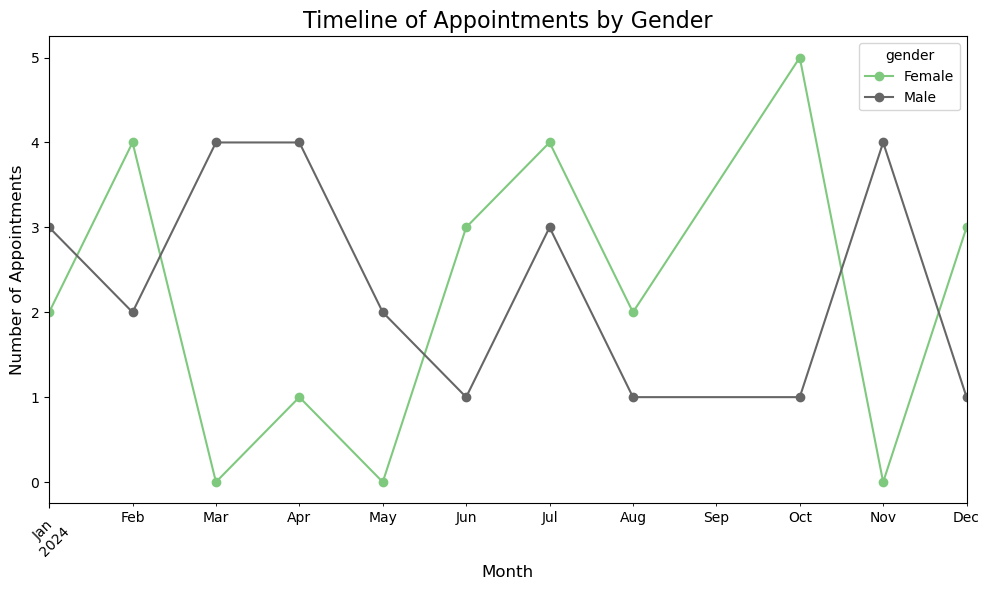

In [90]:
df['month'] = df['appointment_date'].dt.to_period('M')

gender_appointment_trend = df.groupby(['month', 'gender']).size().unstack(fill_value=0)

gender_appointment_trend.plot(kind='line', figsize=(10, 6), marker='o', colormap='Accent')
plt.title('Timeline of Appointments by Gender', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insights: The highest number of appointment is done by female in the month of october**

# Conclusion

The analysis of the Healthcare Patient Management database reveals valuable insights into patient demographics, appointment patterns, and medical histories. By aggregating and examining data, we can identify trends in patient health conditions, evaluate the effectiveness of treatments, and enhance appointment management strategies. The findings indicate a need for improved patient engagement and follow-up care, particularly for patients with chronic conditions.


# Recommendations

**Enhanced Patient Engagement:**

Implement reminder systems (via SMS or email) for upcoming appointments to reduce cancellations and no-shows, thereby improving overall appointment adherence.
Tailored Health Programs:

**Develop targeted health programs** based on prevalent medical conditions identified in the analysis (e.g., hypertension, diabetes), ensuring that patients receive necessary education and support.
Regular Data Audits:

Conduct regular audits of the database to maintain data quality, ensuring that patient records are up-to-date and accurate, which is essential for effective healthcare delivery.
Follow-up Mechanisms:

**Establish follow-up protocols for patients diagnosed** with chronic conditions to monitor their health progress and treatment effectiveness, facilitating timely interventions.
Utilize Visualization Tools:

**Leverage data visualization tools and dashboards for real-time monitoring** of patient data, aiding healthcare providers in making informed decisions regarding patient care and resource allocation.
Research and Development:

**Encourage further research into the effects of demographic factors** on health outcomes, potentially leading to more personalized healthcare solutions for the patient population.

By implementing these recommendations, healthcare providers can enhance patient care, streamline operations, and foster a proactive approach to managing health outcomes in the patient population